In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Начальные данные

In [128]:
Q0 = 1.3e9
Ql = np.logspace(5,6)
beta = Q0/Ql-1
beta_b = 0.21
df = [0,120,240]
f0 = 325e6
Eacc = 6.4e6
l = 0.188
rsh = 302 * Q0
Ib = [1e-6,1e-3,1e-2]
betalambda = beta_b * 299792458 / f0
phase_s = np.pi/9

# Минимальная требуемая мощность

Design Topics for Superconducting RF Cavities and Ancillaries,
H. Padamsee

$P_f=\frac{V_c^2}{4\frac{R}{Q}Q_{ext}}\left[
\left(
1+\frac{I_b\frac{R}{Q}Q_{ext}}{V_c}\cos{\varphi_s}
\right)^2+
\left(
2 Q_{ex}\frac{df}{f}
\right)^2
\right]$

Для проекта SARAF [максимальное значение смещения частоты из-за флуктуаций давления](http://accelconf.web.cern.ch/AccelConf/LINAC2014/papers/mopp134.pdf#search=%20domain%3Daccelconf%2Eweb%2Ecern%2Ech%20helium%20pressure%20%20FileExtension%3Dpdf%20%2Durl%3Aabstract%20%2Durl%3Aaccelconf%2Fjacow) равно 200 Гц.

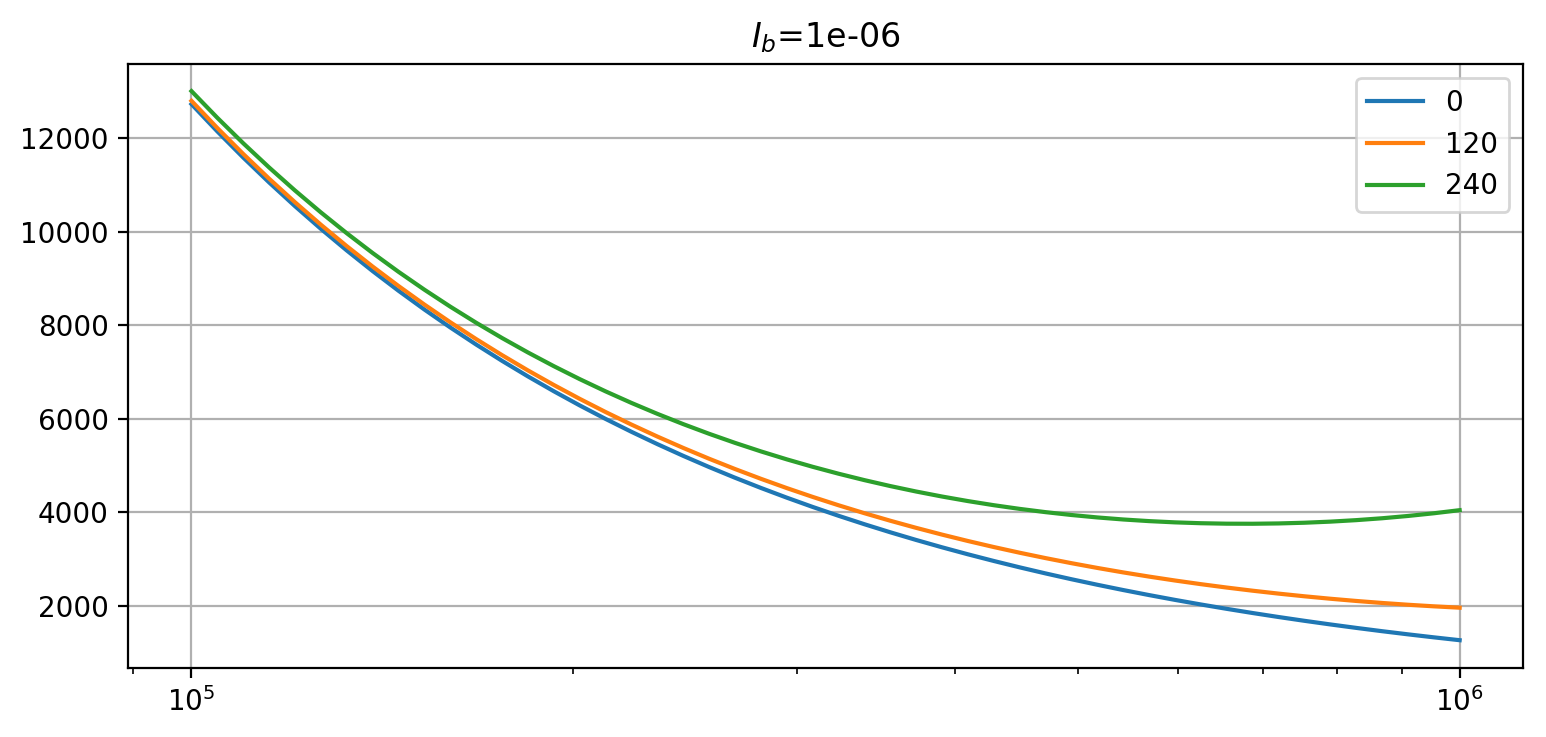

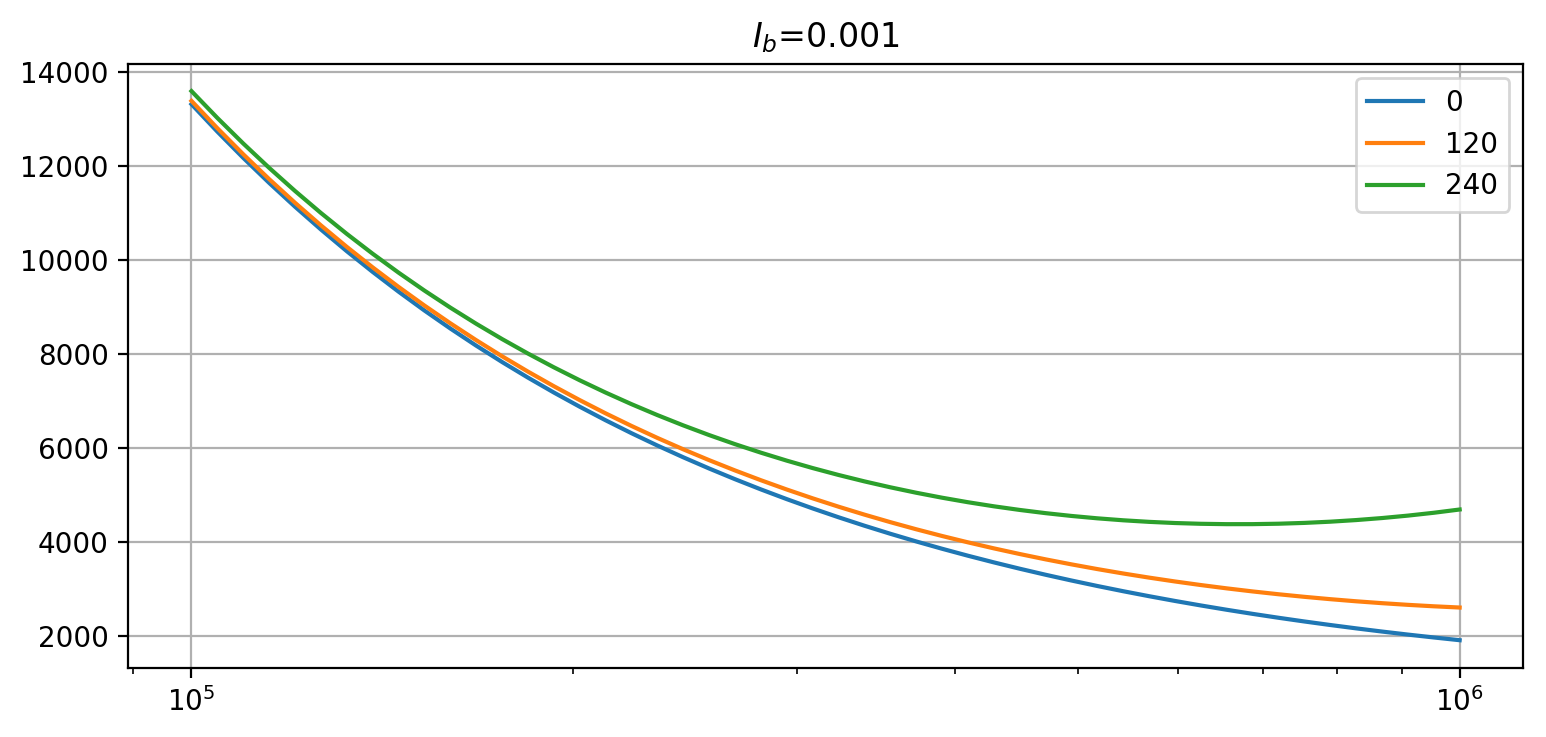

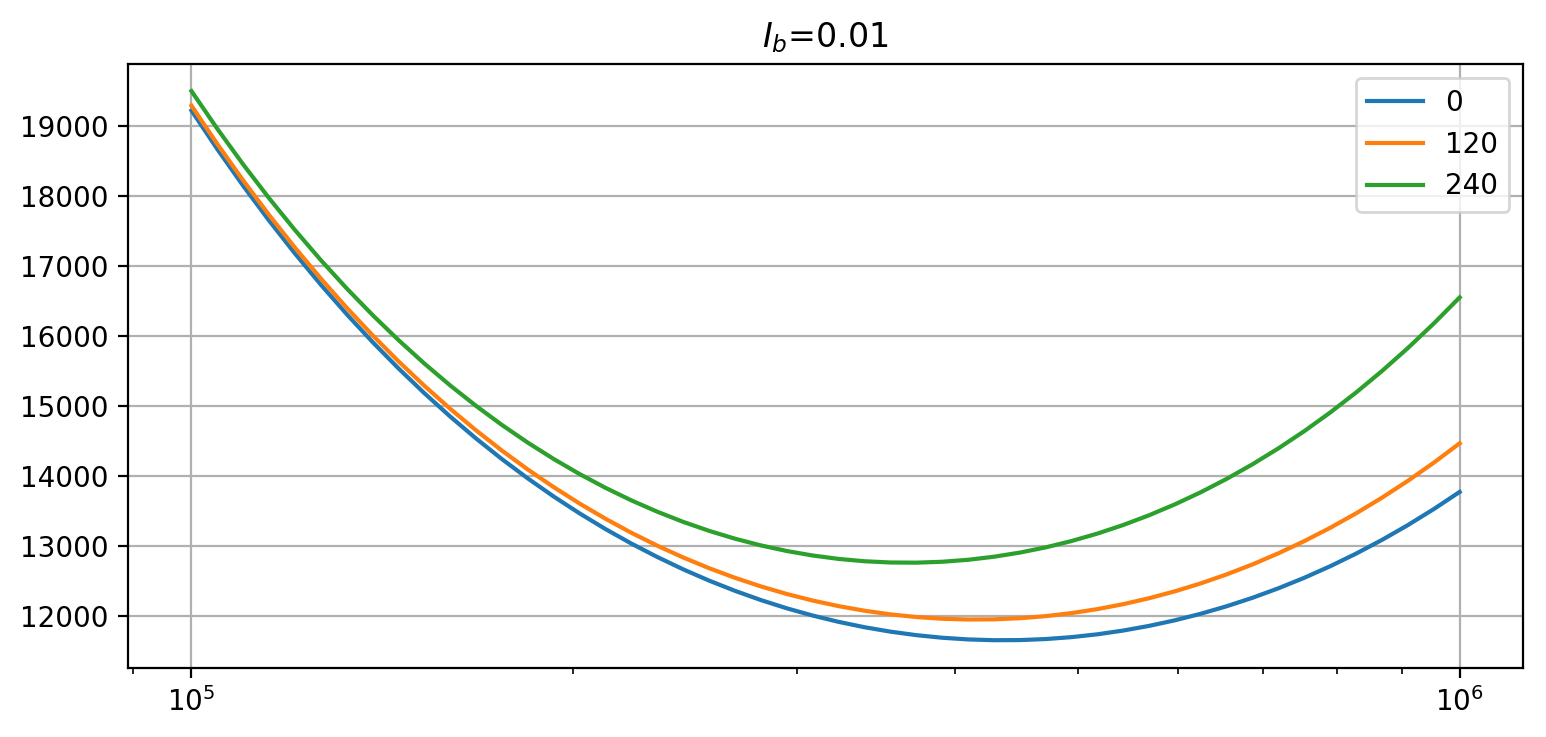

In [129]:
for i in Ib:
    plt.figure(num=None, figsize=(9, 4), dpi=200, facecolor='w', edgecolor='k')
    for f in df:
        Vacc_des = Eacc * betalambda
        Pg = Vacc_des**2/(4*rsh/beta)*((1+i*rsh*np.cos(phase_s)/beta/Vacc_des)**2+(2*Q0*f/beta/f0)**2)
        plt.plot(Ql,Pg)
        plt.xscale('log')
        plt.grid()
    plt.legend(df)
    plt.title(f"$I_b$={i}")
    plt.show()

In [57]:
I0=0.001
Vc=6.4e6*0.21*299792458/f0
I0*rsh*np.sin(np.pi/9)/(2*Q0*Vc)*f0+f0

325000013.53865063